In [1]:
# importing prerequisite libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# uploading our dataset from a local directory
df = pd.read_csv(r'../tochora/baba/reviews.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


In [5]:
# shape of our dataset
df.shape

(12495, 12)

this dataset contains 12495 rows and 12 columns

In [7]:
# checking null variables
df.isnull().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    2162
at                         0
replyContent            6677
repliedAt               6677
sortOrder                  0
appId                      0
dtype: int64

ReviewCreatedverdion has 2162 null values, replycontent and repliedat both have 6677 null values.the rest of the columns dont have any null values.

In [8]:
# checking frequency of various scores
df.score.value_counts()

5    2879
4    2775
1    2506
2    2344
3    1991
Name: score, dtype: int64

score 5 has the highest entries 0f 2879 followed by score 4 at 2775 while score 1 has the lowest entries of 1991.conclusion: the app got the highest ratings of score 5.

replycontent column has 6677 null values thus we may consider what it has before we discard it.

c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of reply content')

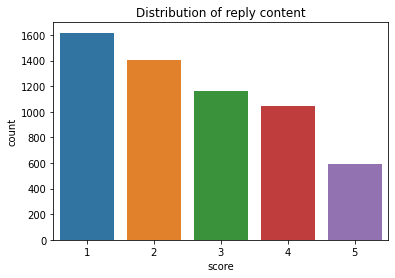

In [11]:
reply = df[~df['replyContent'].isna()]
ax = sns.countplot(reply['score'])
ax.set_title('Distribution of reply content')

score 1 has the highest bar while score 5 has the lowest bar.conclusion: scores in terms of replycontent that is score had the highest entries while score 5 had the lowest entries.

Worldcloud is avisual representation of words in a text where the larger and frequent the word the more relevant it is.Below is a wordcloud of common words in replycontent column.

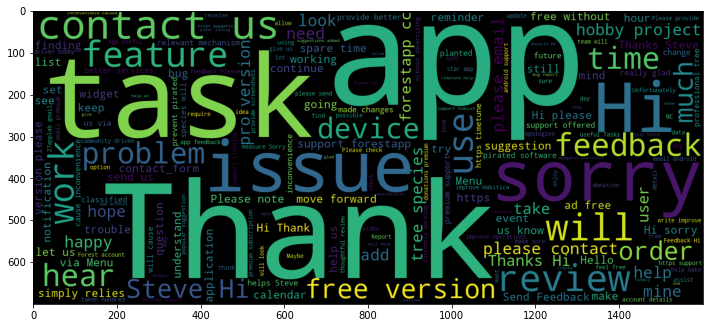

In [13]:
from wordcloud import WordCloud 
plt.figure(figsize=(12, 12))
wc = WordCloud(height=700, width=1600, background_color='black').generate(" ".join(reply['replyContent']))
plt.title('common words in replycontent')
plt.imshow(wc)

In [16]:
# a function that will generate ferequent words in the reviews of various consumer ratings
def top_words(text):
    word = pd.DataFrame(wc.process_text(" ".join(text)).items()).sort_values(1, ascending=False)
    print('Top 5 words in the text')
    for i in range(5):
        item = word.iloc[i]
        print(item[0] + "---> " + str(item[1]))

In [18]:
# frequent words of reviews in respect of replycontent
top_words(reply['replyContent'])

Top 5 words in the text
app---> 1570
Thank---> 1280
task---> 920
sorry---> 700
issue---> 689


A display of how reviews were distributed over the period in which data was collected.

In [20]:
# converting at into a datetime
df['at'] = pd.to_datetime(df['at'])
df['Date'] = df['at'].apply(lambda x : x.date())
# grouping content with respect to date
reviews_per_day = df.groupby(df['Date']).count()['content']
reviews_per_day = reviews_per_day.reset_index()
reviews_per_day['Month'] = reviews_per_day['Date'].apply(lambda x : x.month)
reviews_per_day.head()

,Date,content,Month
0,2015-02-08,1,2
1,2015-03-03,1,3
2,2015-05-12,1,5
3,2015-07-09,1,7
4,2015-07-12,1,7


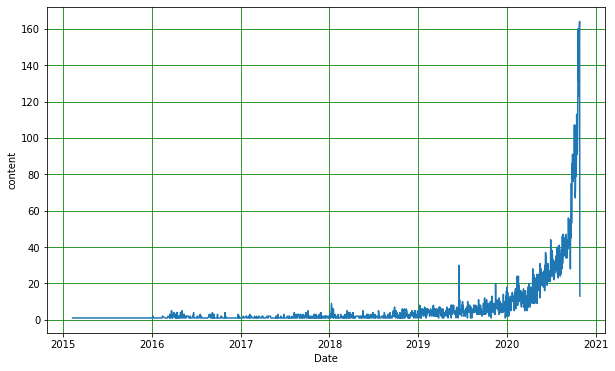

In [23]:
# a plot of reviews from 2015 to 2021
plt.figure(figsize=(10, 6))
sns.lineplot(data=reviews_per_day,x='Date',y='content')
plt.grid(color='green')
plt.title('Distribution of reviews from 2015 to 2021')
plt.show()

this lineplot is lower at year 2015 but rises sharply from year 2020 to 2021.one reason maybe because during 2020 there was a covid 19 oubreak that lead to restrictions thus maximizing peoples time on internet thus increasing bumber of users of our app.

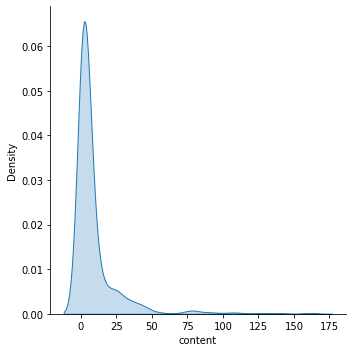

In [28]:
ax = sns.displot(data=reviews_per_day, x='content', kind='kde', fill=True)
ax.set_title('Distribution of content')

In [31]:
# a function to classifiy scores as good, bad or neutral
def sentiment(rating):
    if rating > 3:
        return 'Good'
    elif rating == 3:
        return 'Normal'
    else:
        return 'Bad'
# applying our function into score column
df['Rating'] = df['score'].apply(sentiment)

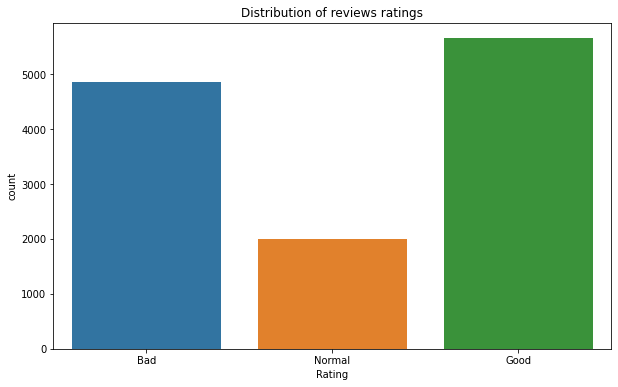

In [44]:
# plot of various distributions of various ratings
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Rating'])
plt.title('Distribution of reviews ratings')
plt.show()

ratings that were classified as good has the highest bar, followed by bad while neutral has the lowest bar.conclusion: reviews rated 4,5 were many followed by those rated 1, 2 while those rated 3 were the lowest.

In [32]:
# a quick display of variables in our dataset
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,Date,Rating
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo,2020-10-27,Bad
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo,2020-10-27,Bad
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo,2020-10-27,Bad
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo,2020-10-26,Bad
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo,2020-10-26,Bad


In [33]:
#
df = df.loc[:, ['content', 'Rating']]
df.head()

,content,Rating
0,I cannot open the app anymore,Bad
1,I have been begging for a refund from this app...,Bad
2,Very costly for the premium version (approx In...,Bad
3,"Used to keep me organized, but all the 2020 UP...",Bad
4,Dan Birthday Oct 28,Bad


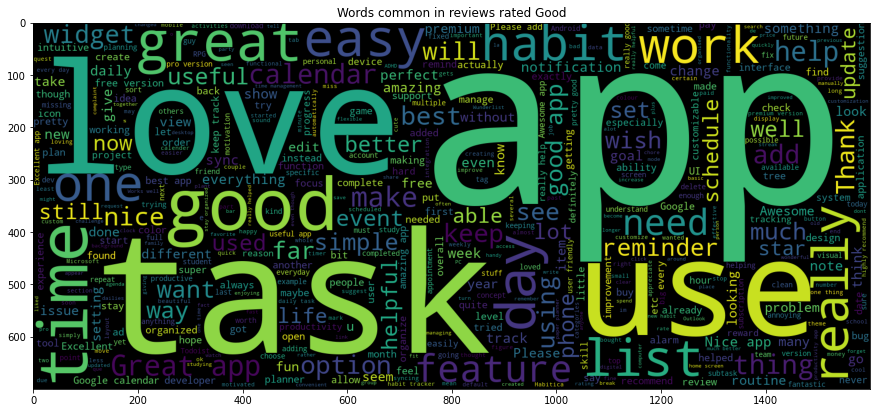

In [43]:
# a display of common words in review rated good
plt.figure(figsize=(15, 12))
wc = WordCloud(max_words=3000, min_font_size=10, height=700,width=1600, colormap='viridis').generate(
    " ".join(df[df['Rating']=='Good'].content)
)
plt.title('Words common in reviews rated Good')
plt.imshow(wc)

In [37]:
# words frequent in ratings classified as good
top_words(df[df['Rating']=='Good']['content'])

Top 5 words in the text
app---> 2342
task---> 943
love---> 786
use---> 717
good---> 605


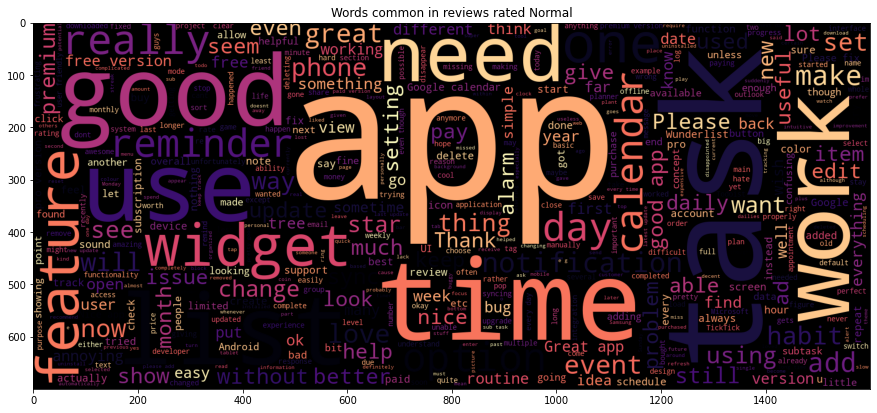

In [41]:
# display of common words rated normal
plt.figure(figsize=(15, 12))
wc = WordCloud(max_words=3000, min_font_size=10, height=700,width=1600, colormap='magma').generate(
    " ".join(df[df['Rating']=='Normal'].content)
)
plt.title('Words common in reviews rated Normal')
plt.imshow(wc)

In [39]:
# ferquent words common in reviews rated normal
top_words(df[df['Rating']=='Normal']['content'])

Top 5 words in the text
app---> 1135
task---> 516
time---> 330
list---> 245
good---> 242


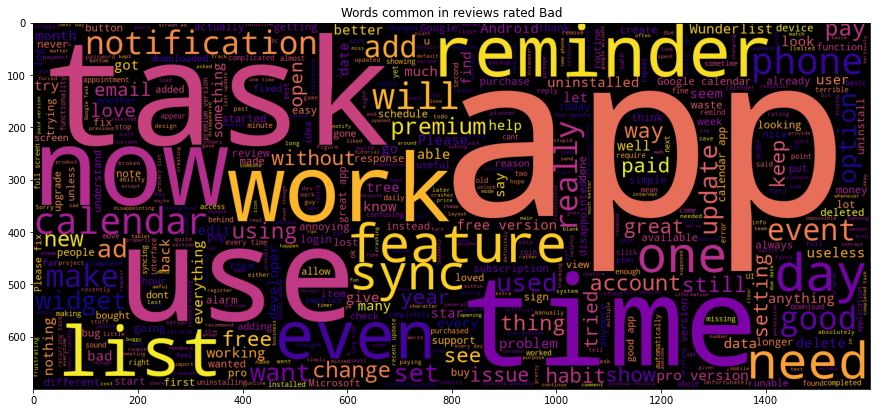

In [40]:
# a display of common words in reviews rated bad
plt.figure(figsize=(15, 12))
wc = WordCloud(max_words=3000, min_font_size=10, height=700,width=1600, colormap='plasma').generate(
    " ".join(df[df['Rating']=='Bad'].content)
)
plt.title('Words common in reviews rated Bad')
plt.imshow(wc)

In [42]:
# frequent words in reviews rated bad
top_words(df[df['Rating']=='Bad']['content'])

Top 5 words in the text
app---> 3022
task---> 836
use---> 674
time---> 614
now---> 578


In [45]:
print('original')
print(df['content'][7].split())
print()

original
['Reset', 'my', 'free', 'trial,', 'new', 'phone', "I'd", 'like', 'to', 'see', 'if', "it's", 'better.']



In [48]:
# importing libraries necessary to clean our text
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
# a function to clean our text
def cleaning(text):
    # removing puctuation marks and converting text into lower case
    clean_text = text.translate(str.maketrans(" ", " ", string.punctuation)).lower()
    # removing stopwords
    clean_text = [word for word in clean_text.split() if word not in set(stopwords.words('english'))]
    sentence = []
    for word in clean_text:
        # applying lemmatizer which reduces different forms of a word into its basic form
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word,'v'))
    return " ".join(sentence)


In [49]:
# applying cleaning function on content column
df['content'] = df['content'].apply(cleaning)

In [51]:
# splitiing our text into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(df['content'],df['Rating'], test_size=0.2)

LSTM
long-short-tem memmory is a deepleraing model that has uses recurrent neural network to store information, avoid being misdirected by noise and learning sequence dependence in order to do predictions.

In [54]:
# importing libraries necessary to perform deep learing model
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer
import tensorflow_hub as hub 
import tensorflow_text as text
from tensorflow.keras.models import Sequential

In [56]:
#preparing ibputs of the model using tokenizers
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)
total_word = len(tokenizer.word_index)
train_seq = tokenizer.texts_to_sequences(x_train)
train_padded = pad_sequences(train_seq)

test_seq = tokenizer.texts_to_sequences(x_test)
test_padded =pad_sequences(test_seq)
# encoding labels
lb = LabelBinarizer()
train_labels = lb.fit_transform(y_train)
test_labels = lb.transform(y_test)



In [58]:
model_lstm = Sequential([tf.keras.layers.Embedding(total_word, 8),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(16, activation='relu'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(3, activation='softmax')])
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 8)           83880     
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               3200      
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                        

In [59]:
# modelling
model_lstm.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy'])
model_lstm.fit(train_padded, train_labels, epochs=6, validation_data=(test_padded, test_labels))

Epoch 1/6
313/313 [==============================] - 94s 257ms/step - loss: 1.0205 - accuracy: 0.4711 - val_loss: 0.9208 - val_accuracy: 0.6214
Epoch 2/6
313/313 [==============================] - 79s 253ms/step - loss: 0.8325 - accuracy: 0.6693 - val_loss: 0.7880 - val_accuracy: 0.6911
Epoch 3/6
313/313 [==============================] - 84s 268ms/step - loss: 0.7342 - accuracy: 0.7197 - val_loss: 0.7515 - val_accuracy: 0.6991
Epoch 4/6
313/313 [==============================] - 79s 251ms/step - loss: 0.6847 - accuracy: 0.7423 - val_loss: 0.7437 - val_accuracy: 0.7071
Epoch 5/6
313/313 [==============================] - 78s 248ms/step - loss: 0.6490 - accuracy: 0.7576 - val_loss: 0.7585 - val_accuracy: 0.6987
Epoch 6/6
313/313 [==============================] - 84s 269ms/step - loss: 0.6231 - accuracy: 0.7635 - val_loss: 0.7551 - val_accuracy: 0.7063


<AxesSubplot:>

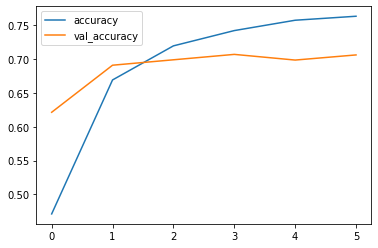

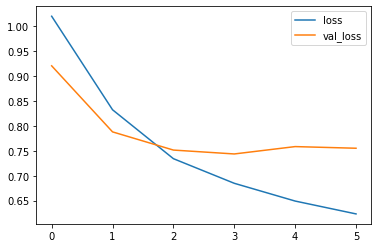

In [60]:
# a visual representation of our model performance
metrics_lstm = pd.DataFrame(model_lstm.history.history)
metrics_lstm[['accuracy','val_accuracy']].plot()
metrics_lstm[['loss', 'val_loss']].plot()

In [61]:
# uing our model to make predictions
def lst_prediction(text):
    clean_text = cleaning(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    padded = pad_sequences(seq)
    pred = model_lstm.predict(padded)
    result = lb.inverse_transform(pred)
    return result


In [62]:
text1 = "There is a major bug in this app. I can't open it "
print(lst_prediction(text1))

1/1 [==============================] - 2s 2s/step
['Bad']


In [63]:
text2 = " This app is amazing with a beautiful interface"
print(lst_prediction(text2))

1/1 [==============================] - 1s 1s/step
['Good']
